In [27]:
import numpy as np
import scipy.stats

In [28]:
data = [8.1, 8.2, 8.1, 8.2, 8.2, 7.4, 7.3, 7.4, 8.1, 8.1, 7.9, 7.8, 8.2, 7.9, 7.9, 8.1, 8.1]
data = np.array(data)

In [29]:
def init():
    mu1 = np.random.random_sample() * 4 + 6.0
    mu2 = np.random.random_sample() * 4 + 6.0
    var1 = np.random.random_sample() * 2.0
    var2 = np.random.random_sample() * 2.0
    w = np.random.random_sample()
    return mu1, mu2, var1, var2, w

In [30]:
def get_prob(x, mu, var):
    return scipy.stats.norm(mu, np.sqrt(var)).pdf(x)

In [31]:
def e_step(mu1, mu2, var1, var2, w):
    soft_label = np.zeros(shape = data.shape)
    for i, x in enumerate(data):
        soft_label[i] = (w * get_prob(x, mu1, var1)) / (w * get_prob(x, mu1, var1) + (1 - w) * get_prob(x, mu2, var2))
    return soft_label

In [32]:
def m_step(mu1, mu2, var1, var2, w, soft_label):
    mu1 = np.sum(data * soft_label) / np.sum(soft_label)
    mu2 = np.sum(data * (1.0 - soft_label)) / np.sum(1.0 - soft_label)
    var1 = np.sum((data - mu1) * (data - mu1) * soft_label) / np.sum(soft_label)
    var2 = np.sum((data - mu2) * (data - mu2) * (1.0 - soft_label)) / np.sum(1.0 - soft_label)
    w = np.sum(soft_label) / data.shape[0]
    return mu1, mu2, var1, var2, w

In [33]:
def EM():
    mu1, mu2, var1, var2, w = init()
    for i in range(100):
        soft_label = e_step(mu1, mu2, var1, var2, w)
        mu1, mu2, var1, var2, w = m_step(mu1, mu2, var1, var2, w, soft_label)
    return mu1, mu2, var1, var2, w

In [34]:
res_list = []
for i in range(100):
    res_list.append(EM())

C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1653: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\AndrewHuang\Anaconda3\lib\si

In [35]:
res_conv_list = []
for res in res_list:
    if res[0] < 1e5:
        res_conv_list.append(res)

In [37]:
import matplotlib.pyplot as plt

In [38]:
res_conv_list = np.array(res_conv_list)

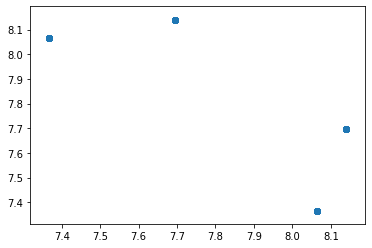

In [39]:
plt.scatter(res_conv_list[:, 0], res_conv_list[:, 1])
plt.savefig("mu_mode")

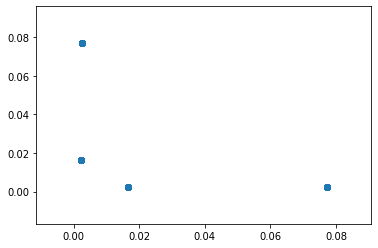

In [40]:
plt.scatter(res_conv_list[:, 2], res_conv_list[:, 3])
plt.savefig("sigma_mode")